In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import calendar
url = 'https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv'

df = pd.read_csv(url)

In [2]:
df['month'] =pd.to_datetime(df['month'])
df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-11-01,Alabama,30694.0,561.0,27765.0,25924.0,1931.0,1519,0.0,32.0,15.0,1.0,2122.0,1152.0,14.0,24.0,0.0,0.0,0.0,0.0,42.0,33.0,9.0,0.0,1.0,0.0,91839
1,2020-11-01,Alaska,96.0,0.0,3474.0,3878.0,461.0,301,0.0,1.0,0.0,0.0,140.0,88.0,3.0,23.0,11.0,0.0,0.0,0.0,13.0,20.0,1.0,0.0,0.0,0.0,8510
2,2020-11-01,Arizona,7483.0,1172.0,25906.0,14698.0,2157.0,1604,0.0,6.0,6.0,2.0,924.0,334.0,6.0,104.0,8.0,1.0,0.0,0.0,18.0,14.0,0.0,0.0,0.0,1.0,54444
3,2020-11-01,Arkansas,4096.0,486.0,10069.0,12954.0,599.0,505,5.0,8.0,13.0,0.0,930.0,1078.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,14.0,1.0,0.0,0.0,0.0,30770
4,2020-11-01,California,28797.0,0.0,56793.0,37256.0,7391.0,0,0.0,0.0,0.0,0.0,328.0,217.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14570,1998-11-01,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14571,1998-11-01,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
14572,1998-11-01,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
14573,1998-11-01,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [3]:
df['month'][0].year

{m: i for i, m in enumerate(calendar.month_abbr) if m}

def to_year(string):
    return string.year

def to_month(string):
    return string.month
df_new = df
df_new['year'] = df['month'].apply(to_year)
df_new['month'] = df['month'].apply(to_month)
df_new

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,11,Alabama,30694.0,561.0,27765.0,25924.0,1931.0,1519,0.0,32.0,15.0,1.0,2122.0,1152.0,14.0,24.0,0.0,0.0,0.0,0.0,42.0,33.0,9.0,0.0,1.0,0.0,91839,2020
1,11,Alaska,96.0,0.0,3474.0,3878.0,461.0,301,0.0,1.0,0.0,0.0,140.0,88.0,3.0,23.0,11.0,0.0,0.0,0.0,13.0,20.0,1.0,0.0,0.0,0.0,8510,2020
2,11,Arizona,7483.0,1172.0,25906.0,14698.0,2157.0,1604,0.0,6.0,6.0,2.0,924.0,334.0,6.0,104.0,8.0,1.0,0.0,0.0,18.0,14.0,0.0,0.0,0.0,1.0,54444,2020
3,11,Arkansas,4096.0,486.0,10069.0,12954.0,599.0,505,5.0,8.0,13.0,0.0,930.0,1078.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,14.0,1.0,0.0,0.0,0.0,30770,2020
4,11,California,28797.0,0.0,56793.0,37256.0,7391.0,0,0.0,0.0,0.0,0.0,328.0,217.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130793,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14570,11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1998
14571,11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361,1998
14572,11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408,1998
14573,11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241,1998


In [4]:
# Rearranging columns
column_list = df.columns.tolist()
df_new = df_new[['year',
    'month',
 'state',
 'permit',
 'permit_recheck',
 'handgun',
 'long_gun',
 'other',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'prepawn_other',
 'redemption_handgun',
 'redemption_long_gun',
 'redemption_other',
 'returned_handgun',
 'returned_long_gun',
 'returned_other',
 'rentals_handgun',
 'rentals_long_gun',
 'private_sale_handgun',
 'private_sale_long_gun',
 'private_sale_other',
 'return_to_seller_handgun',
 'return_to_seller_long_gun',
 'return_to_seller_other',
 'totals']]
 
df_new

,year,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020,11,Alabama,30694.0,561.0,27765.0,25924.0,1931.0,1519,0.0,32.0,15.0,1.0,2122.0,1152.0,14.0,24.0,0.0,0.0,0.0,0.0,42.0,33.0,9.0,0.0,1.0,0.0,91839
1,2020,11,Alaska,96.0,0.0,3474.0,3878.0,461.0,301,0.0,1.0,0.0,0.0,140.0,88.0,3.0,23.0,11.0,0.0,0.0,0.0,13.0,20.0,1.0,0.0,0.0,0.0,8510
2,2020,11,Arizona,7483.0,1172.0,25906.0,14698.0,2157.0,1604,0.0,6.0,6.0,2.0,924.0,334.0,6.0,104.0,8.0,1.0,0.0,0.0,18.0,14.0,0.0,0.0,0.0,1.0,54444
3,2020,11,Arkansas,4096.0,486.0,10069.0,12954.0,599.0,505,5.0,8.0,13.0,0.0,930.0,1078.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,14.0,1.0,0.0,0.0,0.0,30770
4,2020,11,California,28797.0,0.0,56793.0,37256.0,7391.0,0,0.0,0.0,0.0,0.0,328.0,217.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14570,1998,11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14571,1998,11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
14572,1998,11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
14573,1998,11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [5]:
# find the number of unique value in a column 
df_new['state'].nunique()

55

In [6]:
df_new.info()
# df_new was 14575 rows × 28 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14575 entries, 0 to 14574
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       14575 non-null  int64  
 1   month                      14575 non-null  int64  
 2   state                      14575 non-null  object 
 3   permit                     14551 non-null  float64
 4   permit_recheck             3190 non-null   float64
 5   handgun                    14555 non-null  float64
 6   long_gun                   14556 non-null  float64
 7   other                      7590 non-null   float64
 8   multiple                   14575 non-null  int64  
 9   admin                      14552 non-null  float64
 10  prepawn_handgun            12632 non-null  float64
 11  prepawn_long_gun           12630 non-null  float64
 12  prepawn_other              7205 non-null   float64
 13  redemption_handgun         12635 non-null  flo

In [7]:
# importing states codes for plotly
state_code_url = 'https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv'
state_codes = pd.read_csv(state_code_url)
state_codes = state_codes[['code', 'state']]
# df_new was 14575 rows × 28 columns
guns_sales = pd.merge(df_new, state_codes, on = 'state')
# guns_sales is 13250 rows × 29 columns

condition = (guns_sales['year'] == 1998) | (guns_sales['year'] == 1999) | (guns_sales['year'] == 2000)
guns_sales[condition].index


Int64Index([  239,   240,   241,   242,   243,   244,   245,   246,   247,
              248,
            ...
            13240, 13241, 13242, 13243, 13244, 13245, 13246, 13247, 13248,
            13249],
           dtype='int64', length=1300)

In [8]:
guns_sales = guns_sales.drop(labels= guns_sales[condition].index, axis=0)
guns_sales = guns_sales[['year', 'month', 'state', 'totals', 'code']]
# guns_sales is now 11950 rows vs 13250 rows earlier and 98,99 and 00 year data is dropped
# along with not required columns
guns_sales

,year,month,state,totals,code
0,2020,11,Alabama,91839,AL
1,2020,10,Alabama,80934,AL
2,2020,9,Alabama,80478,AL
3,2020,8,Alabama,85347,AL
4,2020,7,Alabama,107490,AL
...,...,...,...,...,...
13219,2001,5,Wyoming,2338,WY
13220,2001,4,Wyoming,2390,WY
13221,2001,3,Wyoming,2713,WY
13222,2001,2,Wyoming,2598,WY


In [9]:
# Making a new column with code_year for df_new DF to merge population from us_pop
guns_sales['year'] = guns_sales['year'].apply(str)
guns_sales['code_year'] = guns_sales['code'] + guns_sales['year']
guns_sales

,year,month,state,totals,code,code_year
0,2020,11,Alabama,91839,AL,AL2020
1,2020,10,Alabama,80934,AL,AL2020
2,2020,9,Alabama,80478,AL,AL2020
3,2020,8,Alabama,85347,AL,AL2020
4,2020,7,Alabama,107490,AL,AL2020
...,...,...,...,...,...,...
13219,2001,5,Wyoming,2338,WY,WY2001
13220,2001,4,Wyoming,2390,WY,WY2001
13221,2001,3,Wyoming,2713,WY,WY2001
13222,2001,2,Wyoming,2598,WY,WY2001


In [10]:
# making a new column in Guns_Sales to match from US_Population DataFrameguns_sales
guns_sales['month'] = guns_sales['month'].apply(str)
guns_sales['code'] = guns_sales['code'].apply(str)
guns_sales['year'] = guns_sales['year'].apply(str)
guns_sales['vlookup'] = guns_sales['code'] + "+" + guns_sales['year']   + "+" + guns_sales['month'] 
guns_sales

,year,month,state,totals,code,code_year,vlookup
0,2020,11,Alabama,91839,AL,AL2020,AL+2020+11
1,2020,10,Alabama,80934,AL,AL2020,AL+2020+10
2,2020,9,Alabama,80478,AL,AL2020,AL+2020+9
3,2020,8,Alabama,85347,AL,AL2020,AL+2020+8
4,2020,7,Alabama,107490,AL,AL2020,AL+2020+7
...,...,...,...,...,...,...,...
13219,2001,5,Wyoming,2338,WY,WY2001,WY+2001+5
13220,2001,4,Wyoming,2390,WY,WY2001,WY+2001+4
13221,2001,3,Wyoming,2713,WY,WY2001,WY+2001+3
13222,2001,2,Wyoming,2598,WY,WY2001,WY+2001+2


In [11]:
us_pop_url = 'https://raw.githubusercontent.com/singparvi/US_Gun_Sales/main/US_Population.csv'
us_pop = pd.read_csv(us_pop_url)
us_pop_annual = us_pop[us_pop.code == 'USA']
us_pop_annual.drop(['code', 'month', 'vlookup'], axis = 1, inplace= True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
us_pop

,code,year,population,month,vlookup
0,AL,2012,4817528.0,1,AL+2012+1
1,AL,2010,4785570.0,1,AL+2010+1
2,AL,2011,4801627.0,1,AL+2011+1
3,AL,2009,4757938.0,1,AL+2009+1
4,AL,2013,4833722.0,1,AL+2013+1
...,...,...,...,...,...
19423,USA,2016,322941311.0,12,USA+2016+12
19424,USA,2017,324985539.0,12,USA+2017+12
19425,USA,2018,326687501.0,12,USA+2018+12
19426,USA,2019,328239523.0,12,USA+2019+12


In [13]:
us_pop_annual[(us_pop_annual.year == 1990) | 
              (us_pop_annual.year == 1991) | 
              (us_pop_annual.year == 1992) | 
              (us_pop_annual.year == 1993) | 
              (us_pop_annual.year == 1994) | 
              (us_pop_annual.year == 1995) | 
              (us_pop_annual.year == 1996) | 
              (us_pop_annual.year == 1997) | 
              (us_pop_annual.year == 1998) | 
              (us_pop_annual.year == 1999) |
              (us_pop_annual.year == 2000) ]

,year,population
1238,1990,249622814.0
1239,1991,252980942.0
1240,1992,256514231.0
1241,1993,259918595.0
1242,1994,263125826.0
...,...,...
15126,1996,269394291.0
15127,1997,272646932.0
15128,1998,275854116.0
15129,2000,282162411.0


In [14]:
us_pop.drop(['code', 'year', 'month'], axis = 1, inplace = True)
us_pop

,population,vlookup
0,4817528.0,AL+2012+1
1,4785570.0,AL+2010+1
2,4801627.0,AL+2011+1
3,4757938.0,AL+2009+1
4,4833722.0,AL+2013+1
...,...,...
19423,322941311.0,USA+2016+12
19424,324985539.0,USA+2017+12
19425,326687501.0,USA+2018+12
19426,328239523.0,USA+2019+12


In [15]:
# merging the guns_sales and population DataFrame
guns_sales = guns_sales.merge(us_pop, on = 'vlookup')
guns_sales.drop(['code_year', 'vlookup'], axis = 1,inplace= True)

In [16]:
guns_sales

,year,month,state,totals,code,population
0,2020,11,Alabama,91839,AL,4926478.0
1,2020,10,Alabama,80934,AL,4926478.0
2,2020,9,Alabama,80478,AL,4926478.0
3,2020,8,Alabama,85347,AL,4926478.0
4,2020,7,Alabama,107490,AL,4926478.0
...,...,...,...,...,...,...
11945,2001,5,Wyoming,2338,WY,494657.0
11946,2001,4,Wyoming,2390,WY,494657.0
11947,2001,3,Wyoming,2713,WY,494657.0
11948,2001,2,Wyoming,2598,WY,494657.0


In [17]:
guns_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11950 entries, 0 to 11949
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        11950 non-null  object 
 1   month       11950 non-null  object 
 2   state       11950 non-null  object 
 3   totals      11950 non-null  int64  
 4   code        11950 non-null  object 
 5   population  11950 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 653.5+ KB


In [18]:
# Calculate guns per 100k
guns_sales['guns per 100k'] = guns_sales['totals'] * 1000 / guns_sales['population'] 
guns_sales

,year,month,state,totals,code,population,guns per 100k
0,2020,11,Alabama,91839,AL,4926478.0,18.641918
1,2020,10,Alabama,80934,AL,4926478.0,16.428369
2,2020,9,Alabama,80478,AL,4926478.0,16.335808
3,2020,8,Alabama,85347,AL,4926478.0,17.324141
4,2020,7,Alabama,107490,AL,4926478.0,21.818833
...,...,...,...,...,...,...,...
11945,2001,5,Wyoming,2338,WY,494657.0,4.726507
11946,2001,4,Wyoming,2390,WY,494657.0,4.831631
11947,2001,3,Wyoming,2713,WY,494657.0,5.484609
11948,2001,2,Wyoming,2598,WY,494657.0,5.252124


In [19]:
guns_sales['year'].apply(int)
guns_sales.year.value_counts()

2010    600
2008    600
2013    600
2001    600
2011    600
2017    600
2012    600
2016    600
2014    600
2009    600
2005    600
2002    600
2004    600
2018    600
2003    600
2006    600
2007    600
2019    600
2015    600
2020    550
Name: year, dtype: int64

In [20]:
guns_sales['month'] = guns_sales['month'].apply(int)
guns_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11950 entries, 0 to 11949
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           11950 non-null  object 
 1   month          11950 non-null  int64  
 2   state          11950 non-null  object 
 3   totals         11950 non-null  int64  
 4   code           11950 non-null  object 
 5   population     11950 non-null  float64
 6   guns per 100k  11950 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 746.9+ KB


In [21]:
# change integer months to string months
import calendar

def month_int_to_str(integer):
    return calendar.month_name[integer]

guns_sales['month'] = guns_sales['month'].apply(month_int_to_str)

In [22]:
# make 2019 data for US Guns Sales
guns_sales_19 = guns_sales[guns_sales['year'] == '2019']
guns_sales_19

,year,month,state,totals,code,population,guns per 100k
11,2019,December,Alabama,100100,AL,4903185.0,20.415301
12,2019,November,Alabama,77657,AL,4903185.0,15.838073
13,2019,October,Alabama,63254,AL,4903185.0,12.900594
14,2019,September,Alabama,56872,AL,4903185.0,11.598991
15,2019,August,Alabama,69377,AL,4903185.0,14.149374
...,...,...,...,...,...,...,...
11729,2019,May,Wyoming,4793,WY,578759.0,8.281513
11730,2019,April,Wyoming,4821,WY,578759.0,8.329892
11731,2019,March,Wyoming,5880,WY,578759.0,10.159669
11732,2019,February,Wyoming,4842,WY,578759.0,8.366177


In [23]:
guns_sales_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 11 to 11733
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           600 non-null    object 
 1   month          600 non-null    object 
 2   state          600 non-null    object 
 3   totals         600 non-null    int64  
 4   code           600 non-null    object 
 5   population     600 non-null    float64
 6   guns per 100k  600 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 37.5+ KB


In [24]:
#Plotting last year data on a heat map using total guns purchased 
guns_sales_19 = guns_sales_19.pivot(index='state', columns='month', values= 'totals')
#get the list of columns to sort the columns properly
# guns_sales_19.columns.tolist()
# guns_sales_19 = guns_sales_19[['January','February','March','April','May','June','July','August','September','October','November','December']]
guns_sales_19.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
state,,,,,,,,,,,,
Alabama,41146,69377,100100,46203,44989,51757,42898,51923,43908,77657,63254,56872
Alaska,6505,6796,7840,5233,4582,5298,5557,7136,6376,7213,8281,6106
Arizona,30222,33851,38171,32776,29039,26325,26746,37340,28950,31352,28833,29307
Arkansas,15812,18303,25699,20289,17258,13684,13956,22246,15317,23192,19303,16285
California,114466,99146,106600,96970,98502,89532,115987,123056,111816,92765,96252,95540


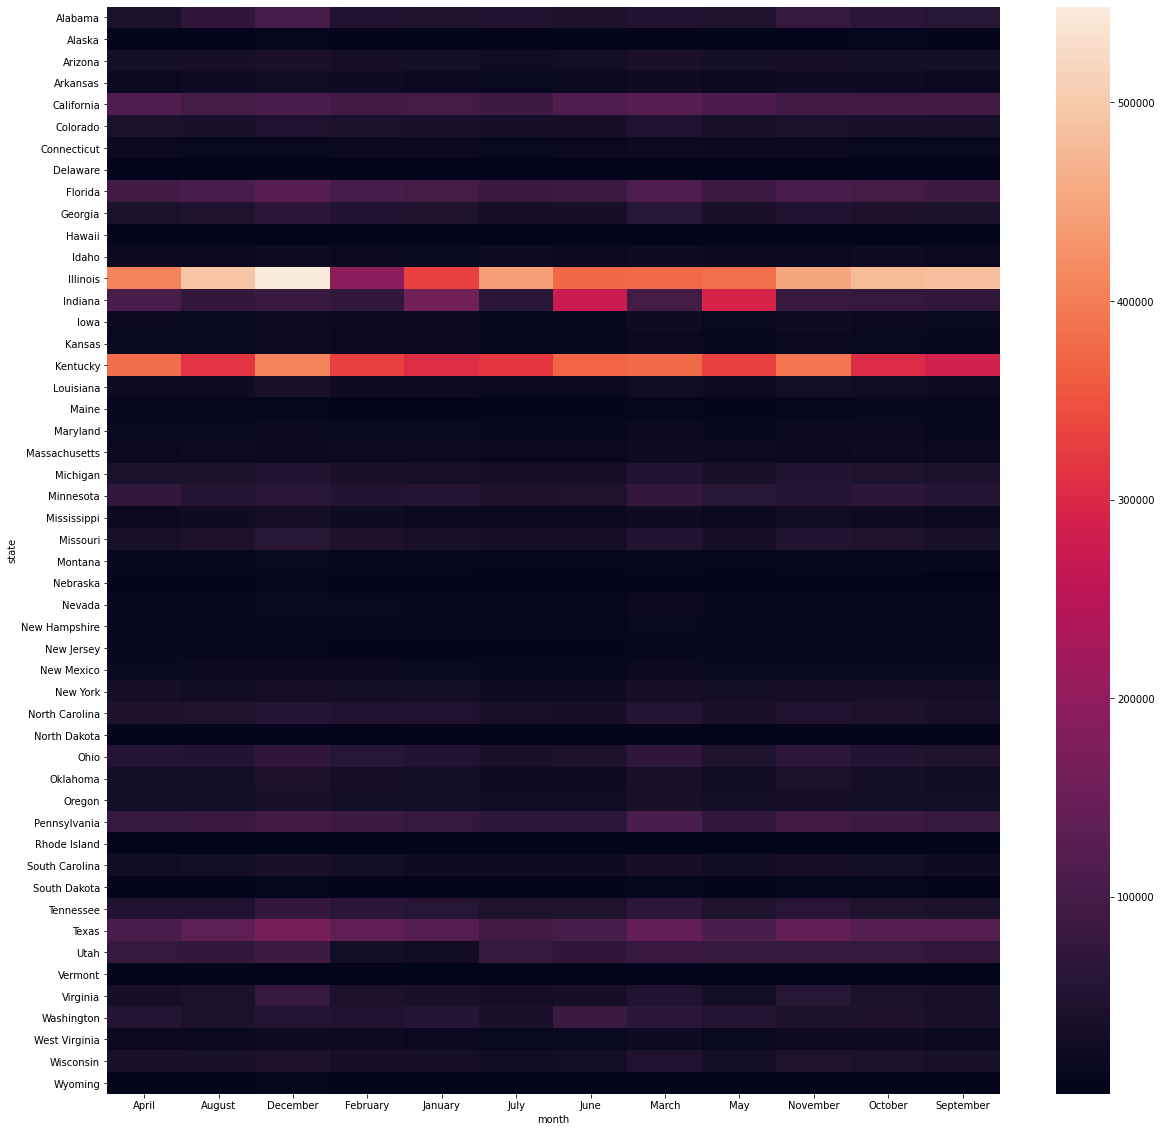

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


guns_sales_19
fig, ax = plt.subplots(figsize = (20, 20))
ax = sns.heatmap(guns_sales_19)

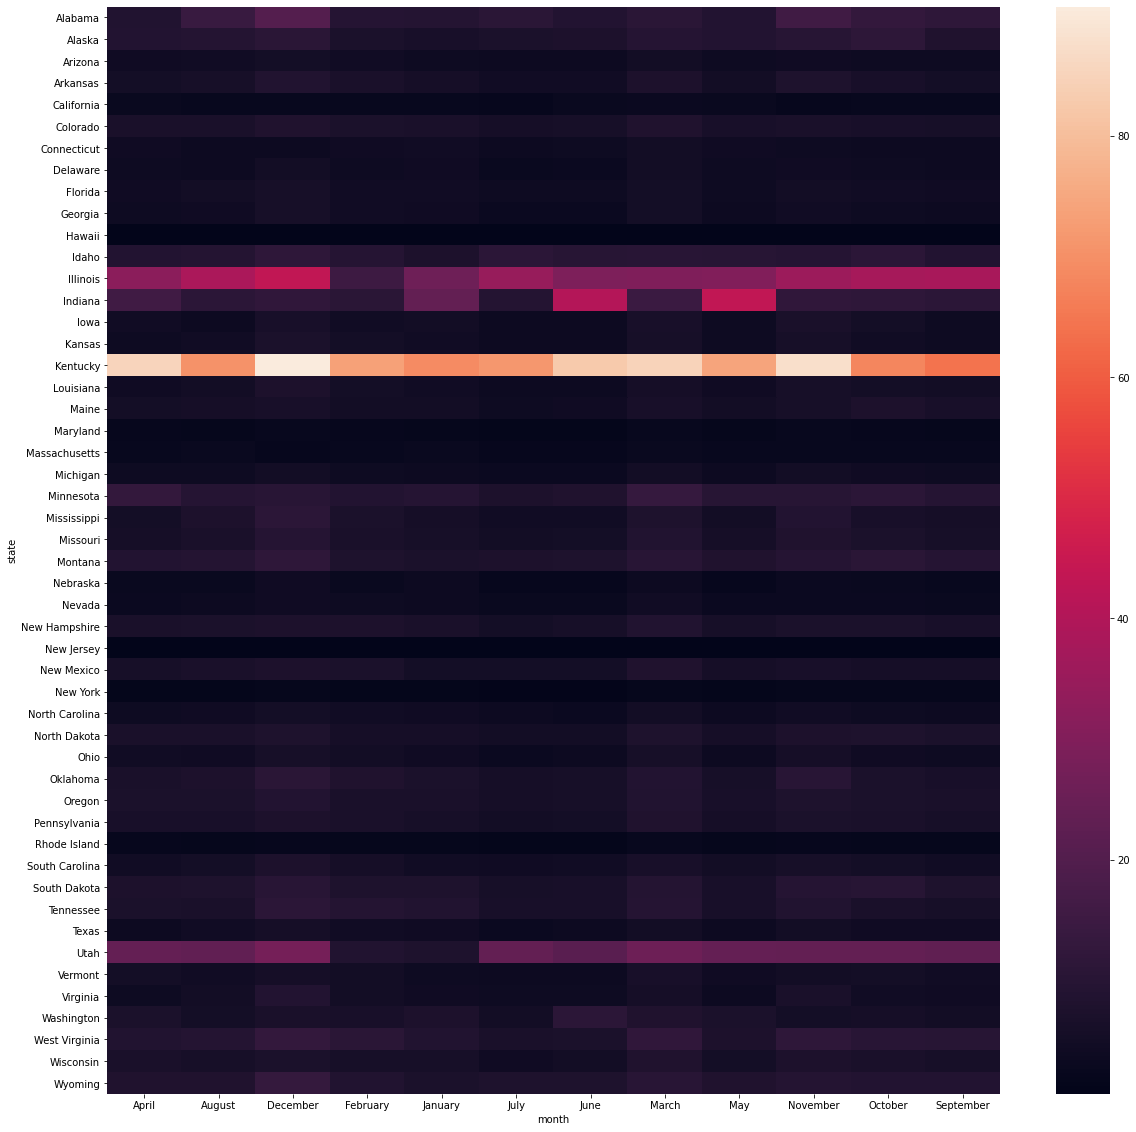

In [26]:
# Doing the same as above but using the per 100k capita purchase 
guns_sales_percap_19 =  guns_sales[guns_sales['year'] == '2019']
#Plotting last year data on a heat map using total guns purchased 
guns_sales_percap_19 = guns_sales_percap_19.pivot(index='state', columns='month', values= 'guns per 100k')
guns_sales_percap_19

fig, ax = plt.subplots(figsize = (20, 20))
ax = sns.heatmap(guns_sales_percap_19)

In [27]:

guns_sales_19['total'] = 0
guns_sales_19['total'] = guns_sales_19.iloc[:,-13:-1].sum(axis = 1)
#to bring the index back as a column

guns_sales_19 = guns_sales_19.reset_index()
guns_sales_19.head()

month,state,April,August,December,February,January,July,June,March,May,November,October,September,total
0,Alabama,41146,69377,100100,46203,44989,51757,42898,51923,43908,77657,63254,56872,690084
1,Alaska,6505,6796,7840,5233,4582,5298,5557,7136,6376,7213,8281,6106,76923
2,Arizona,30222,33851,38171,32776,29039,26325,26746,37340,28950,31352,28833,29307,372912
3,Arkansas,15812,18303,25699,20289,17258,13684,13956,22246,15317,23192,19303,16285,221344
4,California,114466,99146,106600,96970,98502,89532,115987,123056,111816,92765,96252,95540,1240632


In [28]:
guns_sales_19[guns_sales_19.state == 'Illinois']

month,state,April,August,December,February,January,July,June,March,May,November,October,September,total
12,Illinois,405464,491715,548192,190886,331325,439458,373166,376018,381771,450084,478329,483162,4949570


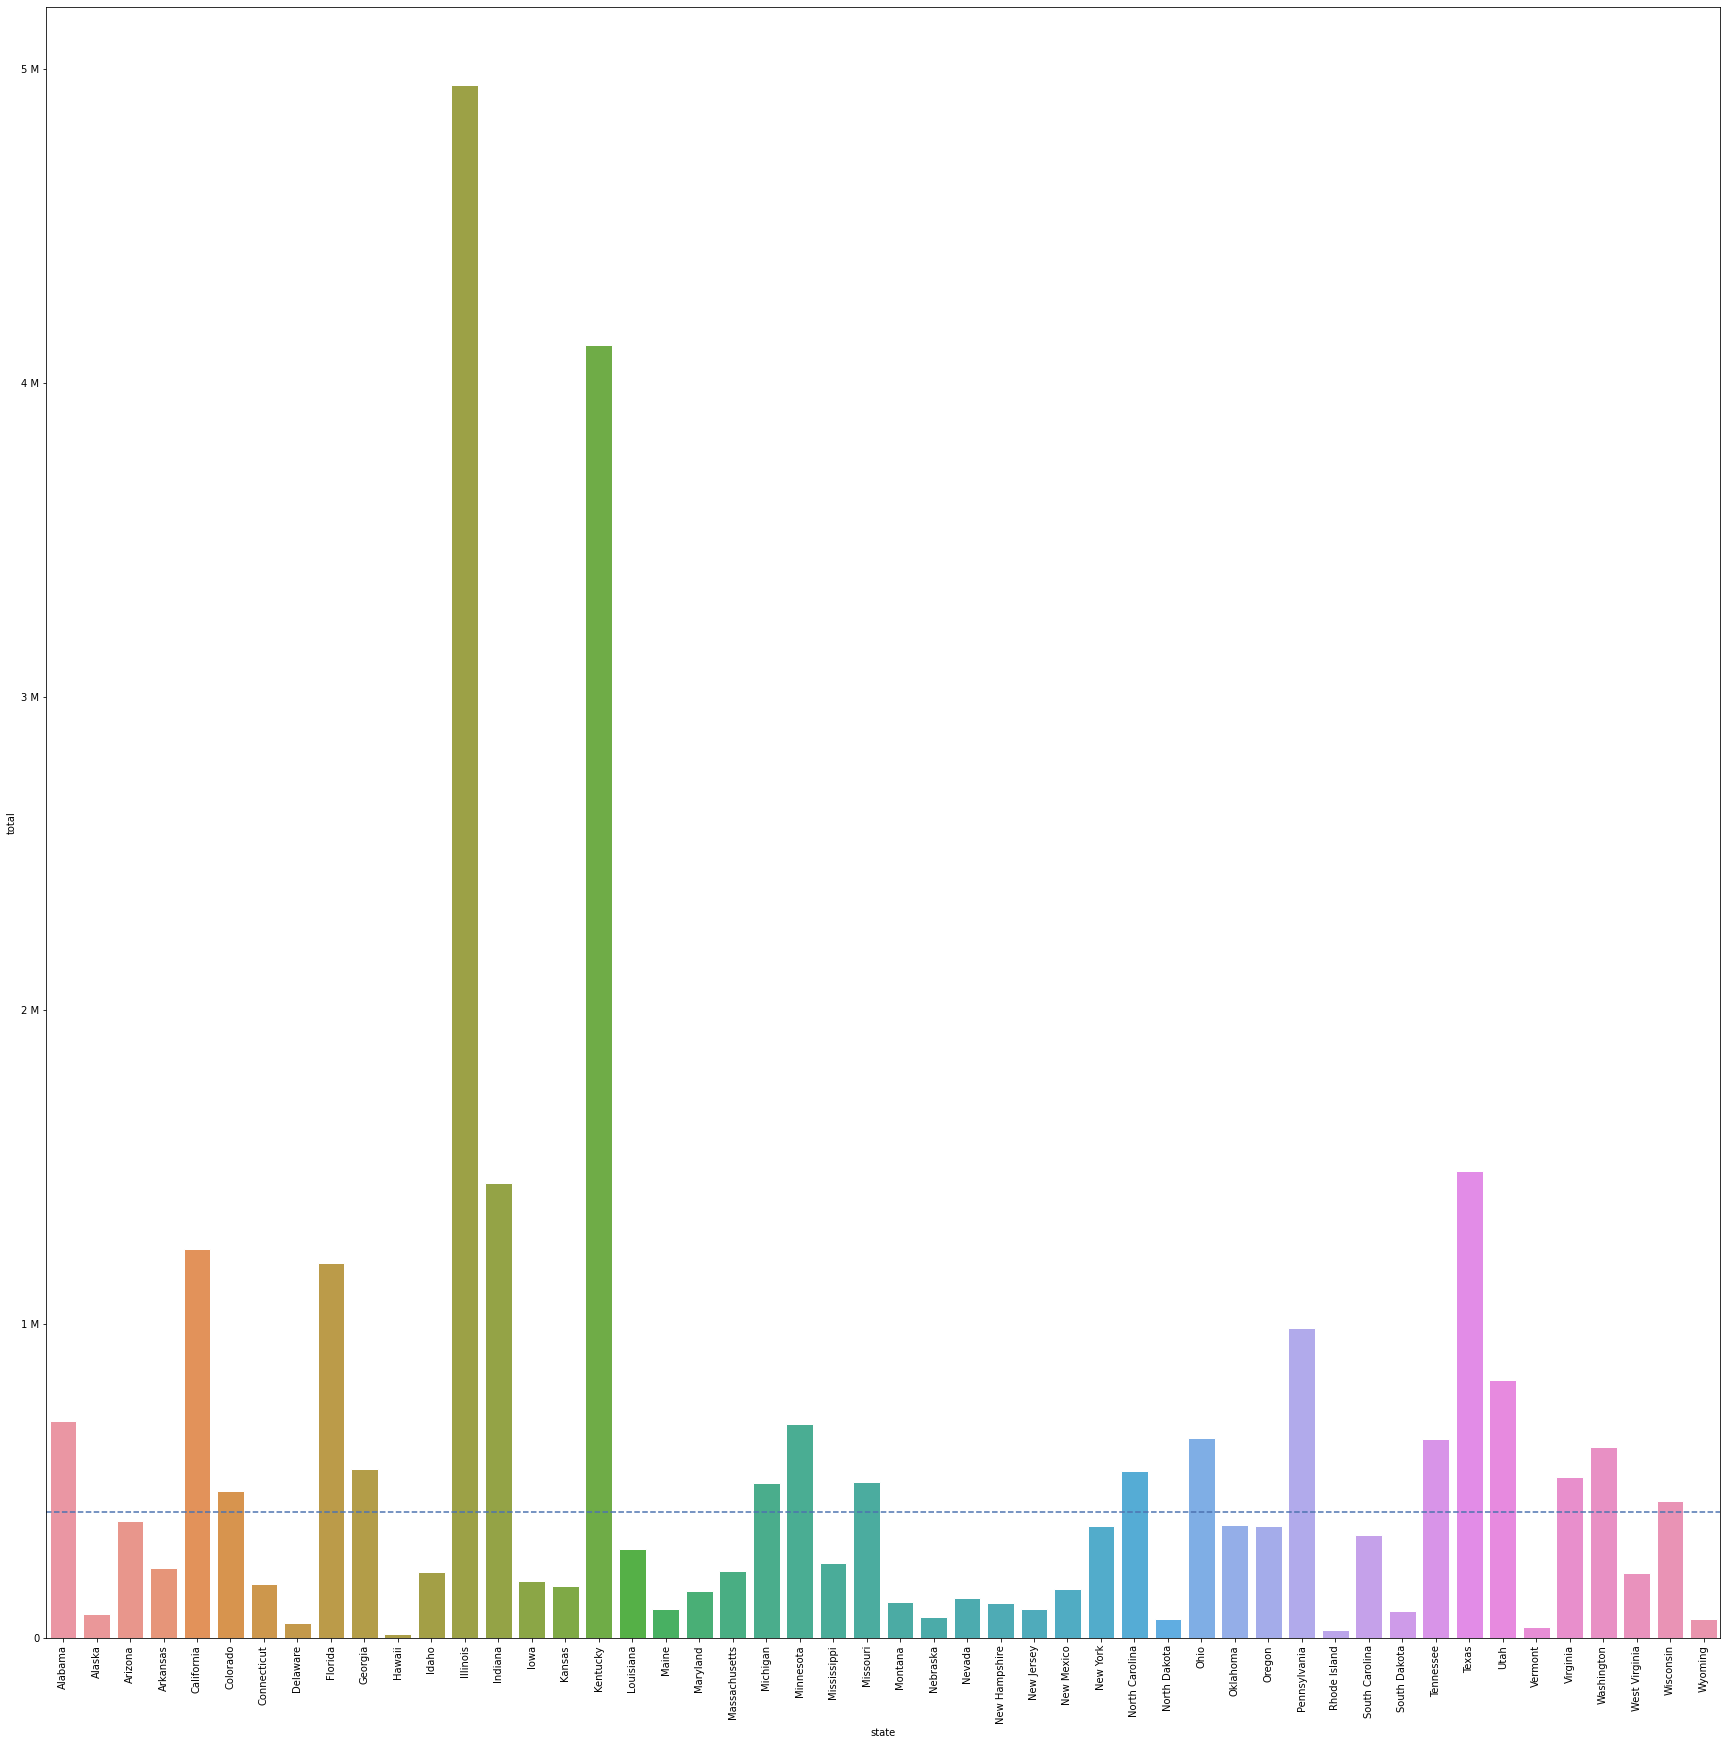

In [29]:
# plot to see the states annual guns sales
# #plotting histogram
# fig, ax1 = plt.subplots(figsize = (10, 10))
# ax1.hist(df_new_pivot_2019['totals'], bins=100)
# ax1.plot()

#plotting bar plot to see the states annual buying
fig, ax1 = plt.subplots(figsize = (30, 30))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x = guns_sales_19['state'], y = guns_sales_19['total'])
# rotating the states names to display more beautifully
plt.xticks(rotation = 90)
# adding a new dashed line to set a threshold of arms buying
ax.axhline(400000, ls='--')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

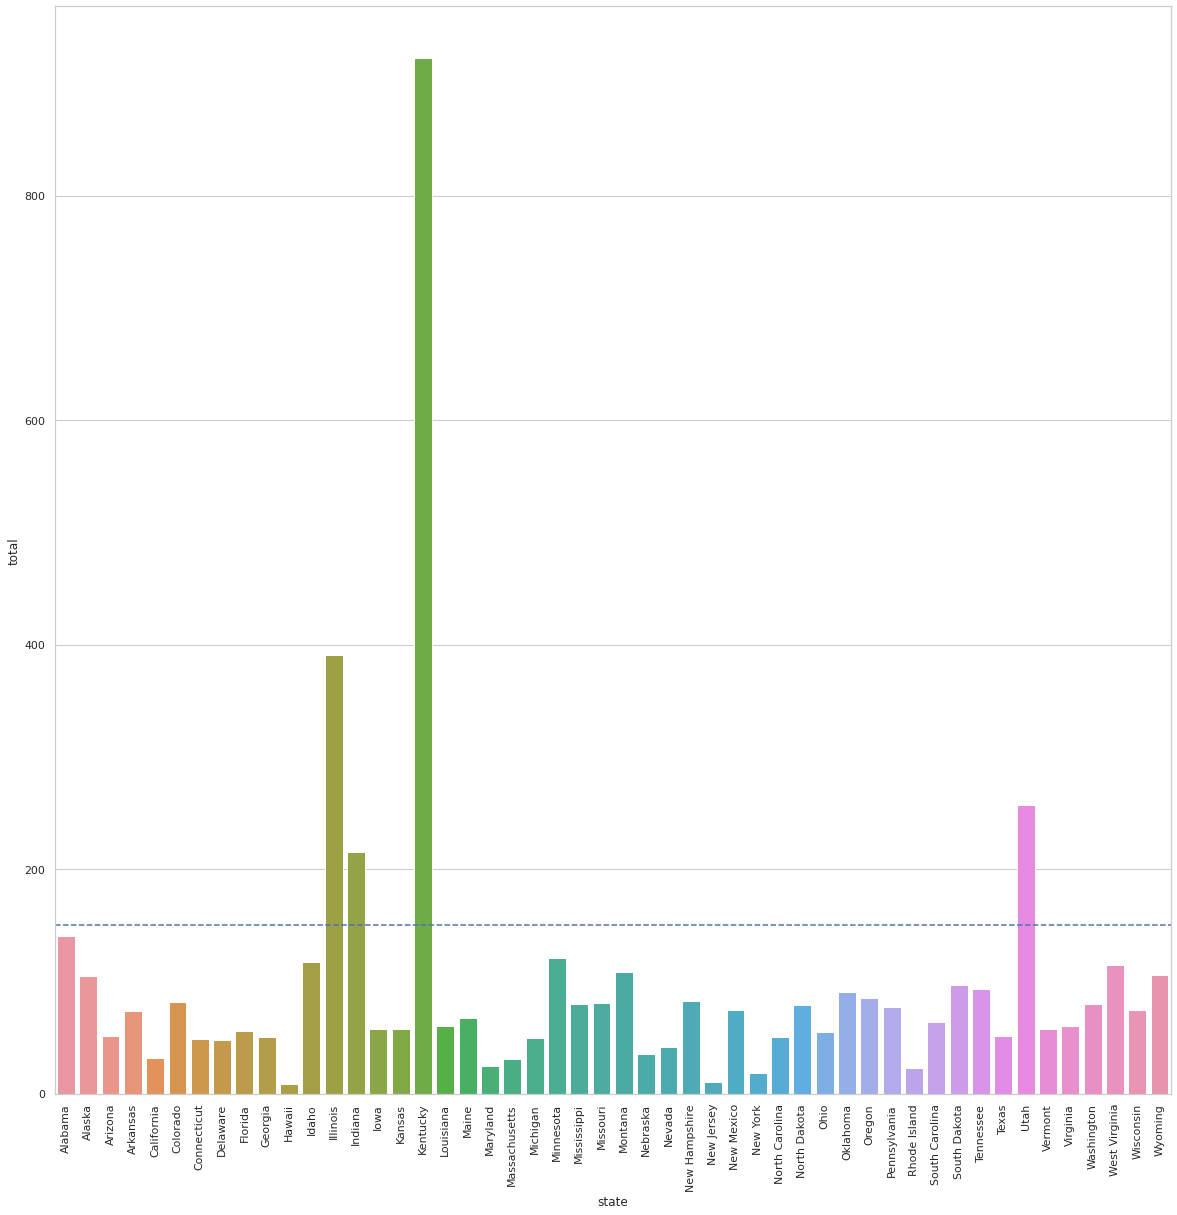

In [30]:
# Doing the same as above but using the per 100k capita purchase 


guns_sales_percap_19['total'] = 0
guns_sales_percap_19['total'] = guns_sales_percap_19.iloc[:,-13:-1].sum(axis = 1)
#to bring the index back as a column
guns_sales_percap_19 = guns_sales_percap_19.reset_index()

#plotting bar plot to see the states annual buying
fig, ax1 = plt.subplots(figsize = (20, 20))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x = guns_sales_percap_19['state'], y = guns_sales_percap_19['total'])
# rotating the states names to display more beautifully
plt.xticks(rotation = 90)
# adding a new dashed line to set a threshold of arms buying
ax.axhline(150, ls='--')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [31]:
guns_sales

,year,month,state,totals,code,population,guns per 100k
0,2020,November,Alabama,91839,AL,4926478.0,18.641918
1,2020,October,Alabama,80934,AL,4926478.0,16.428369
2,2020,September,Alabama,80478,AL,4926478.0,16.335808
3,2020,August,Alabama,85347,AL,4926478.0,17.324141
4,2020,July,Alabama,107490,AL,4926478.0,21.818833
...,...,...,...,...,...,...,...
11945,2001,May,Wyoming,2338,WY,494657.0,4.726507
11946,2001,April,Wyoming,2390,WY,494657.0,4.831631
11947,2001,March,Wyoming,2713,WY,494657.0,5.484609
11948,2001,February,Wyoming,2598,WY,494657.0,5.252124


In [32]:
guns_sales

,year,month,state,totals,code,population,guns per 100k
0,2020,November,Alabama,91839,AL,4926478.0,18.641918
1,2020,October,Alabama,80934,AL,4926478.0,16.428369
2,2020,September,Alabama,80478,AL,4926478.0,16.335808
3,2020,August,Alabama,85347,AL,4926478.0,17.324141
4,2020,July,Alabama,107490,AL,4926478.0,21.818833
...,...,...,...,...,...,...,...
11945,2001,May,Wyoming,2338,WY,494657.0,4.726507
11946,2001,April,Wyoming,2390,WY,494657.0,4.831631
11947,2001,March,Wyoming,2713,WY,494657.0,5.484609
11948,2001,February,Wyoming,2598,WY,494657.0,5.252124


In [36]:
df_annual_data_bystate[df_annual_data_bystate.state =='Alabama']

,state,year,totals
0,Alabama,2001,230187
1,Alabama,2002,221008
2,Alabama,2003,225479
3,Alabama,2004,229997
4,Alabama,2005,235873
5,Alabama,2006,243176
6,Alabama,2007,245355
7,Alabama,2008,299432
8,Alabama,2009,317868
9,Alabama,2010,308607


In [33]:
# Getting the annual sales of data and plotting it to see the trend
df_annual_data_bystate = pd.pivot_table(guns_sales, index = ['state','year',], values= 'totals', aggfunc= 'sum')
df_annual_data_bystate = df_annual_data_bystate.reset_index()
df_annual_data_bystate

,state,year,totals
0,Alabama,2001,230187
1,Alabama,2002,221008
2,Alabama,2003,225479
3,Alabama,2004,229997
4,Alabama,2005,235873
...,...,...,...
995,Wyoming,2016,63594
996,Wyoming,2017,54711
997,Wyoming,2018,60150
998,Wyoming,2019,61291


In [34]:
# another time in order to get a Data Frame of annual sales
df_annual_data_bystate = pd.pivot_table(df_annual_data_bystate, index = 'year', values= 'totals', aggfunc= 'sum')
df_annual_data_bystate = df_annual_data_bystate.reset_index()

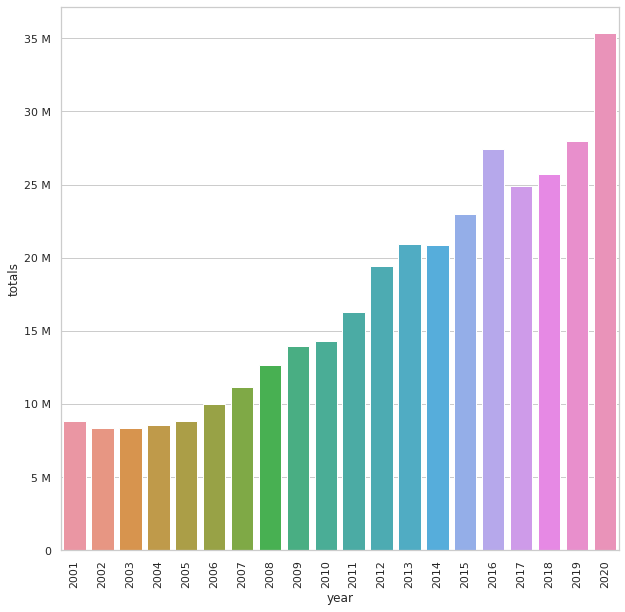

In [35]:
# Plot
fig, ax1 = plt.subplots(figsize = (10, 10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x = df_annual_data_bystate['year'], y = df_annual_data_bystate['totals'])
plt.xticks(rotation = 90)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
# plt.savefig("annual_data.png")

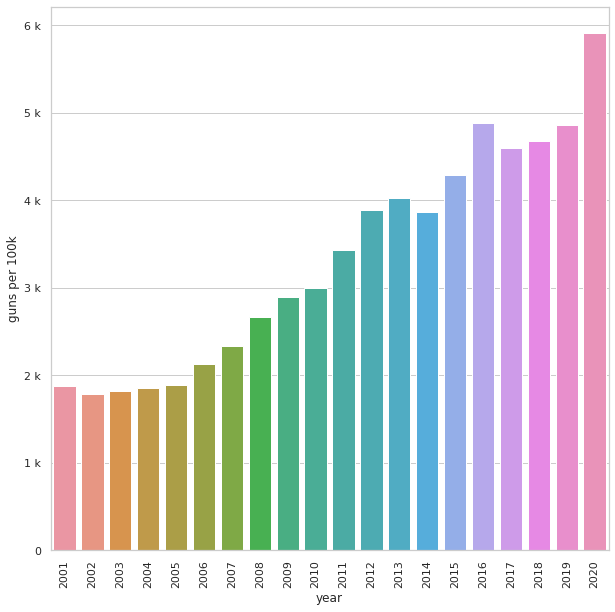

In [36]:
# Similarly for per capita

# Getting the annual sales of data and plotting it to see the trend
df_annual_percap_bystate = pd.pivot_table(guns_sales, index = ['state','year',], values= 'guns per 100k', aggfunc= 'sum')
df_annual_percap_bystate = df_annual_percap_bystate.reset_index()
df_annual_percap_bystate

# another time in order to get a Data Frame of annual sales
df_annual_percap_bystate = pd.pivot_table(df_annual_percap_bystate, index = 'year', values= 'guns per 100k', aggfunc= 'sum')
df_annual_percap_bystate = df_annual_percap_bystate.reset_index()

# Plot
fig, ax1 = plt.subplots(figsize = (10, 10))
sns.set_theme(style='whitegrid')
ax1 = sns.barplot(x = df_annual_percap_bystate['year'], y = df_annual_percap_bystate['guns per 100k'])
plt.xticks(rotation = 90)
ax1.yaxis.set_major_formatter(ticker.EngFormatter())
# plt.savefig("annual_data.png")

In [37]:
us_pop_annual

,year,population
1238,1990,249622814.0
1239,1991,252980942.0
1240,1992,256514231.0
1241,1993,259918595.0
1242,1994,263125826.0
...,...,...
19423,2016,322941311.0
19424,2017,324985539.0
19425,2018,326687501.0
19426,2019,328239523.0


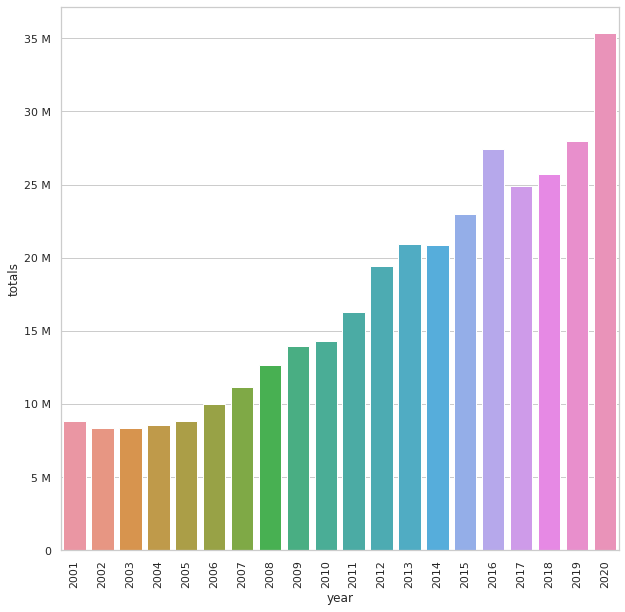

In [38]:
# Plot
fig, ax1 = plt.subplots(figsize = (10, 10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x = df_annual_data_bystate['year'], y = df_annual_data_bystate['totals'])
plt.xticks(rotation = 90)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
# plt.savefig("annual_data.png")

In [39]:
df_annual_data_bystate.year = df_annual_data_bystate.year.apply(int)
df_annual_data_bystate
us_annual_gunsales_pop = df_annual_data_bystate.merge(us_pop_annual, on = 'year')
us_annual_gunsales_pop = us_annual_gunsales_pop.drop_duplicates()
us_annual_gunsales_pop = us_annual_gunsales_pop.rename(columns= {'totals': 'gun sales'})

In [40]:
# sample
import plotly.express as px
data = px.data.gapminder()

data_canada = data[data.country == 'Canada']
fig = px.bar(data_canada, x = 'year', y = 'pop', color = 'lifeExp', labels={'pop:population of Canada'}, height= 400)
fig.show()

In [41]:
# use US annual gunsales along with US annual population to plot
fig = px.bar(us_annual_gunsales_pop, x = 'year', y = 'gun sales', color = 'population', labels={'pop:population of US'}, height= 800)
fig.show()


In [42]:
## Installing chart_studio using bash
!pip install chart_Studio

     |████████████████████████████████| 71kB 3.9MB/s 


In [43]:
# sort guns sales by year in asending manner
guns_sales_px = guns_sales.sort_values(by = 'year')
guns_sales_px[(guns_sales_px.state == 'Illinois') & (guns_sales_px.year == '2019')].totals.sum()

4949570

In [44]:
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
username = 'ParviSingh' # your username
api_key = 'DnzTYZDKcRkOHSePo4kQ' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username= username, api_key= api_key)
# plotting the figure with animation
# fig = px.choropleth(us_annual_gunsales_pop, locationmode= 'country names', scope = 'usa', animation_frame= 'year', color= 'population', )

# fig = px.choropleth(final,locations='code',color = 'totals',animation_frame= 'year', color_continuous_scale='Inferno', 
# locationmode='USA-states', scope = 'usa', title = 'Guns by State', height = 600)
fig = px.choropleth(guns_sales_px, locations = 'code', scope ='usa', locationmode='USA-states', color= 'totals', 
                    hover_name= 'population', hover_data=['population'], animation_frame= 'year', 
                    color_continuous_scale='Inferno'
                    )
# py.plot(fig,)
fig.show()


In [45]:
guns_sales

,year,month,state,totals,code,population,guns per 100k
0,2020,November,Alabama,91839,AL,4926478.0,18.641918
1,2020,October,Alabama,80934,AL,4926478.0,16.428369
2,2020,September,Alabama,80478,AL,4926478.0,16.335808
3,2020,August,Alabama,85347,AL,4926478.0,17.324141
4,2020,July,Alabama,107490,AL,4926478.0,21.818833
...,...,...,...,...,...,...,...
11945,2001,May,Wyoming,2338,WY,494657.0,4.726507
11946,2001,April,Wyoming,2390,WY,494657.0,4.831631
11947,2001,March,Wyoming,2713,WY,494657.0,5.484609
11948,2001,February,Wyoming,2598,WY,494657.0,5.252124


In [46]:
us_annual_gunsales_pop

,year,gun sales,population
0,2001,8812457,284968955.0
12,2002,8358574,287625193.0
24,2003,8393942,290107933.0
36,2004,8571726,292805298.0
48,2005,8857599,295516599.0
60,2006,9982755,298379912.0
72,2007,11151998,301231207.0
84,2008,12684240,304093966.0
96,2009,13974323,306771529.0
108,2010,14309926,309326295.0


In [48]:
guns_sales[guns_sales.year == '2018'].head()

,year,month,state,totals,code,population,guns per 100k
23,2018,December,Alabama,54383,AL,4887681.0,11.126544
24,2018,November,Alabama,45345,AL,4887681.0,9.277406
25,2018,October,Alabama,37123,AL,4887681.0,7.595217
26,2018,September,Alabama,32706,AL,4887681.0,6.691517
27,2018,August,Alabama,37227,AL,4887681.0,7.616495


In [38]:
import plotly.graph_objects as go
import pandas as pd

# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Surface(z=df.values.tolist(), colorscale="Viridis"))

# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)

# Update 3D scene options
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Trace type:", showarrow=False,
        x=0, y=1.085, yref="paper", align="left")
    ]
)

fig.show()

In [39]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61
0,100,100,101,101,101,101,101,100,100,100,101,101,102,102,102,102,103,104,103,102,101,101,102,103,104,104,105,107,107,107,108,108,110,110,110,110,110,110,110,110,108,108,108,107,107,108,108,108,108,108,107,107,107,107,106,106,105,105,104,104,103
1,101,101,102,102,102,102,102,101,101,101,102,102,103,103,103,103,104,105,104,103,102,102,103,105,106,106,107,109,110,110,110,110,111,112,113,114,116,115,114,112,110,110,110,109,108,109,109,109,109,108,108,108,108,107,107,106,106,105,105,104,104
2,102,102,103,103,103,103,103,102,102,102,103,103,104,104,104,104,105,106,105,104,104,105,106,107,108,110,111,113,114,115,114,115,116,118,119,119,121,121,120,118,116,114,112,111,110,110,110,110,109,109,109,109,108,108,107,107,106,106,105,105,104
3,103,103,104,104,104,104,104,103,103,103,103,104,104,104,105,105,106,107,106,106,106,107,108,110,111,114,117,118,117,119,120,121,122,124,125,126,127,127,126,124,122,120,117,116,113,111,110,110,110,109,109,109,109,108,108,107,107,106,106,105,105
4,104,104,105,105,105,105,105,104,104,103,104,104,105,105,105,106,107,108,108,108,109,110,112,114,115,118,121,122,121,123,128,131,129,130,131,131,132,132,131,130,128,126,122,119,115,114,112,110,110,110,110,110,109,109,108,107,107,107,106,106,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,99,99,99,99,100,100,101,101,102,102,101,101,101,101,101,102,102,101,100,100,101,101,101,103,104,107,109,109,110,110,109,108,105,102,100,100,99,99,99,98,98,98,97,96,96,96,96,96,95,95,95,95,95,95,95,94,94,94,94,94,94
83,98,99,99,99,99,100,100,101,101,102,101,100,100,100,101,101,101,100,100,100,100,101,101,101,103,106,107,109,109,109,109,107,104,101,100,99,99,99,98,98,98,97,96,96,96,96,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94
84,98,98,98,99,99,99,100,100,101,101,100,100,99,99,100,100,100,100,100,100,100,101,101,101,102,105,106,109,108,109,107,105,102,100,100,99,99,98,98,98,97,96,96,96,96,95,95,95,95,95,95,94,94,94,94,94,94,94,94,94,94
85,97,98,98,98,99,99,99,100,100,100,100,100,99,99,99,100,100,100,100,100,100,100,101,101,101,103,104,105,106,105,104,101,100,100,99,99,98,98,97,97,97,96,96,96,95,95,95,95,95,94,94,94,94,94,94,94,94,94,94,94,94


In [43]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 4.0MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [5]:
type(px.data.tips())

pandas.core.frame.DataFrame

In [1]:
import plotly.express as px
import plotly.graph_objects as go
df = px.data.tips()

# We have a list for every day
# In your case will be gropuby('RuleName')
# here for every element d
# d[0] is the name(key) and d[1] is the dataframe
dfs = list(df.groupby("day"))

first_title = dfs[0][0]
traces = []
buttons = []
for i,d in enumerate(dfs):
    visible = [False] * len(dfs)
    visible[i] = True
    name = d[0]
    traces.append(
        px.treemap(d[1],
                   path=['day', 'time', 'sex'],
                   values='total_bill').update_traces(visible=True if i==0 else False).data[0]
    )
    buttons.append(dict(label=name,
                        method="update",
                        args=[{"visible":visible},
                              {"title":f"{name}"}]))

updatemenus = [{'active':0, "buttons":buttons}]

fig = go.Figure(data=traces,
                 layout=dict(updatemenus=updatemenus))
fig.update_layout(title=first_title, title_x=0.5)
fig.show()